## Data 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/vgames2.csv')

##Data Preprocessing

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
''' 결측치 제거 '''
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df['Year'] = df['Year'].astype('int')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
''' M,K 제거 '''
def to_num(str):
  if 'K' in str:
    str = str.replace('K', '')
    return round(float(str) / 1000, 2)
  elif 'M' in str:
    str = str.replace('M', '')
    return round(float(str), 2)
  else:
    return round(float(str), 2)

In [6]:
''' Year 칼럼 수정'''
def to_year(year):
  if year < 22:
    year += 2000    
  elif year < 100:
    year += 1900
  return year

In [7]:
df.loc[:,'NA_Sales':] = df.loc[:,'NA_Sales':].applymap(to_num)

In [8]:
df['Year'] = df['Year'].apply(to_year)
df['Year'].sort_values()

13958    1980
5604     1980
14691    1980
9045     1980
12859    1980
         ... 
6986     2016
9911     2017
5196     2017
14903    2017
6765     2020
Name: Year, Length: 16241, dtype: int64

In [9]:
df.to_csv('vgames2_edited.csv')

##2. 게임 출고량 데이터 분석

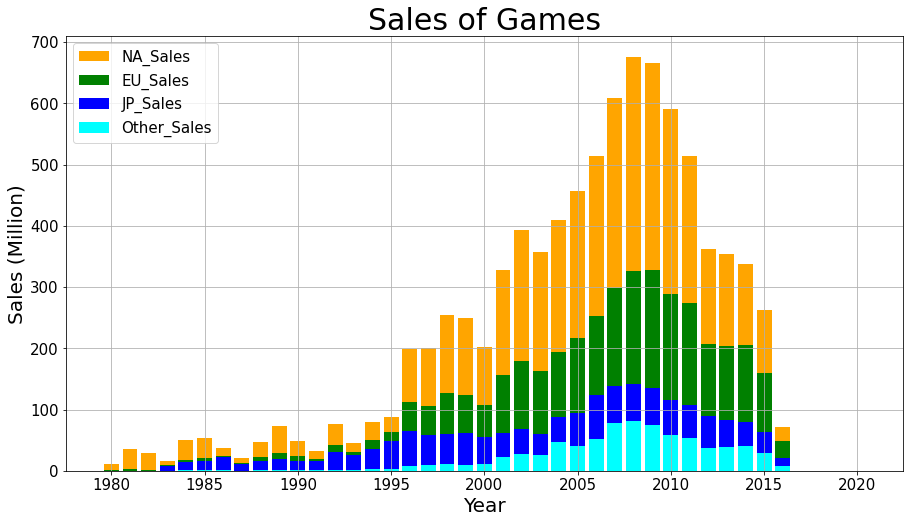

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,8))

df_plot = df.groupby(['Year']).sum()

plt.bar(df_plot.index, df_plot['NA_Sales'], color='orange', label='NA_Sales', bottom=df_plot['EU_Sales']+df_plot['JP_Sales']+df_plot['Other_Sales'])
plt.bar(df_plot.index, df_plot['EU_Sales'], color='g', label='EU_Sales', bottom=df_plot['JP_Sales']+df_plot['Other_Sales'])
plt.bar(df_plot.index, df_plot['JP_Sales'], color='b', label='JP_Sales', bottom=df_plot['Other_Sales'])
plt.bar(df_plot.index, df_plot['Other_Sales'], color='cyan', label='Other_Sales')

# plt.plot(df_plot.index, df_plot['Total_Sales'], color='violet', label='Total_Sales')

plt.title('Sales of Games', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales (Million)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc='upper left')
plt.grid()
plt.show()

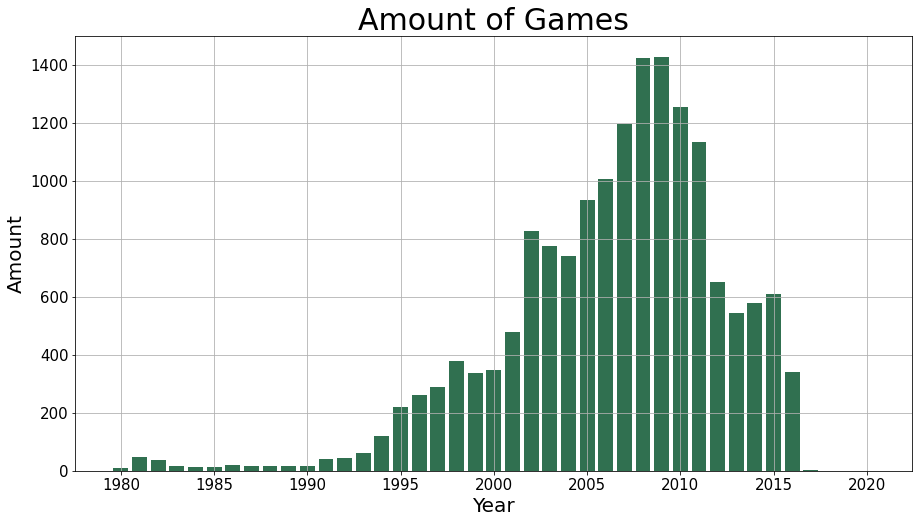

In [11]:
''' 연도별 게임 타이틀 수량 시각화 '''
fig = plt.figure(figsize=(15,8))
df_count = df.groupby('Year').count()
plt.bar(df_count.index, df_count['Name'], color='#307050')

plt.title('Amount of Games', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Amount', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

##Sampling Bias 조정

In [12]:
df_count[df_count['Name'] >= 100]

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,,,,,
1994,121,121,121,121,121,121,121,121
1995,219,219,219,219,219,219,219,219
1996,262,262,262,262,262,262,262,262
1997,289,289,289,289,289,289,289,289
1998,377,377,377,377,377,377,377,377
1999,336,336,336,336,336,336,336,336
2000,348,348,348,348,348,348,348,348
2001,480,480,480,480,480,480,480,480
2002,826,826,826,826,826,826,826,826


In [13]:
df_sample = df[(df['Year'] >= 1994) & (df['Year'] <= 2016)]
df_sample.reset_index(drop=True)
df_sample.NA_Sales.mean(), df_sample.EU_Sales.mean(), df_sample.JP_Sales.mean(), df_sample.Other_Sales.mean()

(0.25101493101493727,
 0.1470711270711253,
 0.06835191835191581,
 0.04860769860769449)

In [14]:
df_sample.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,15873.000000,15873.000000,15873.000000,15873.000000,15873.000000
mean,2006.838531,0.251015,0.147071,0.068352,0.048608
std,5.086618,0.718777,0.509865,0.279743,0.191092
min,1994.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.230000,0.110000,0.030000,0.040000
max,2016.000000,41.490000,29.020000,10.220000,10.570000


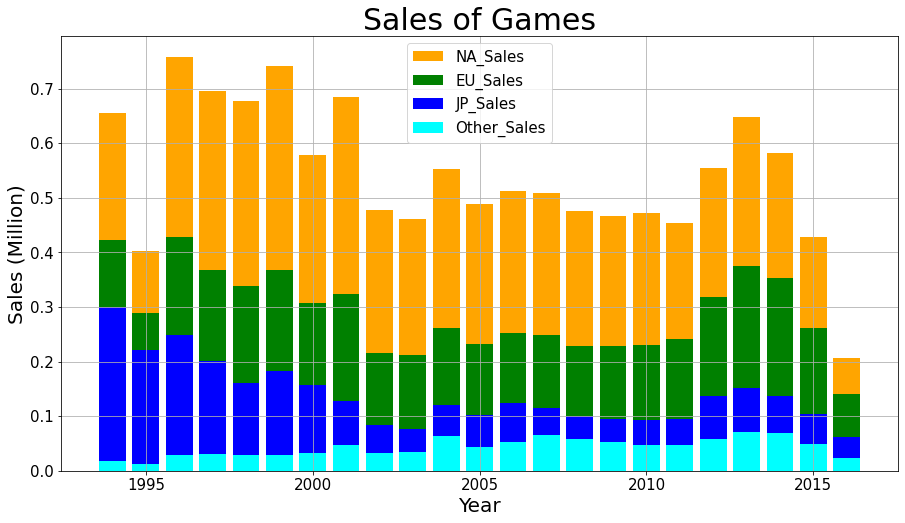

In [15]:
fig = plt.figure(figsize=(15,8))

df_plot = df_sample.groupby(['Year']).mean()

plt.bar(df_plot.index, df_plot['NA_Sales'], color='orange', label='NA_Sales', bottom=df_plot['EU_Sales']+df_plot['JP_Sales']+df_plot['Other_Sales'])
plt.bar(df_plot.index, df_plot['EU_Sales'], color='g', label='EU_Sales', bottom=df_plot['JP_Sales']+df_plot['Other_Sales'])
plt.bar(df_plot.index, df_plot['JP_Sales'], color='b', label='JP_Sales', bottom=df_plot['Other_Sales'])
plt.bar(df_plot.index, df_plot['Other_Sales'], color='cyan', label='Other_Sales')

# plt.plot(df_plot.index, df_plot['Total_Sales'], color='violet', label='Total_Sales')

plt.title('Sales of Games', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales (Million)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc='upper center')
plt.grid()
plt.show()

In [16]:
from scipy.stats import chi2_contingency

chi2_contingency(df_plot.values*1000000)

(1181255.6349458946,
 0.0,
 66,
 array([[306098.67053974, 181233.49487699, 115182.37207173,
          52196.2063132 ],
        [188101.84788053, 111370.47810139,  70781.15364484,
          32075.28749652],
        [354628.89336873, 209967.04629996, 133443.88942088,
          60471.6212921 ],
        [325283.03301202, 192592.08409173, 122401.28737229,
          55467.54016063],
        [316446.45804407, 187360.16537297, 119076.15804715,
          53960.71986208],
        [346697.74779372, 205271.21005735, 130459.46561085,
          59119.1955857 ],
        [270765.91063625, 160313.8366842 , 101886.94974811,
          46171.23396593],
        [320074.82273136, 189508.43087117, 120441.48136165,
          54579.43170249],
        [223051.57909244, 132063.3544258 ,  83932.44547228,
          38034.94546469],
        [215584.51486932, 127642.28933838,  81122.65159727,
          36761.65530614],
        [258299.17125569, 152932.58689414,  97195.81988688,
          44045.39493627],
        [22

##3. 게임 장르 분석

In [17]:
df_sample.groupby('Genre').count()

,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,,,,
Action,3158,3158,3158,3158,3158,3158,3158,3158
Adventure,1259,1259,1259,1259,1259,1259,1259,1259
Fighting,812,812,812,812,812,812,812,812
Misc,1667,1667,1667,1667,1667,1667,1667,1667
Platform,814,814,814,814,814,814,814,814
Puzzle,533,533,533,533,533,533,533,533
Racing,1204,1204,1204,1204,1204,1204,1204,1204
Role-Playing,1433,1433,1433,1433,1433,1433,1433,1433
Shooter,1242,1242,1242,1242,1242,1242,1242,1242


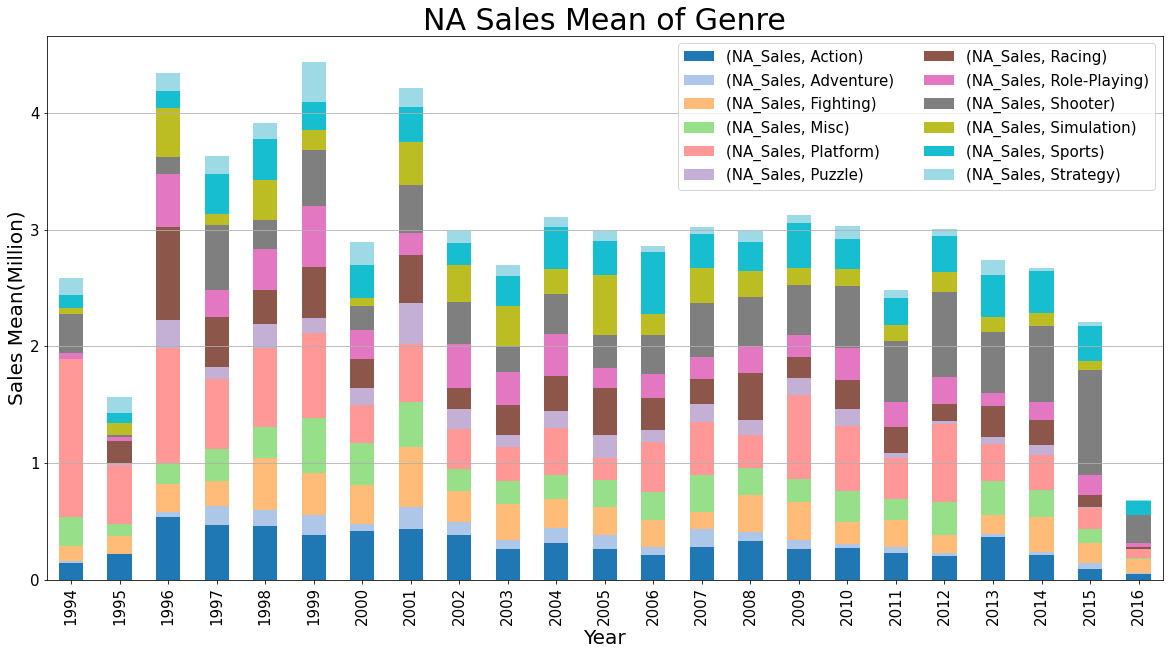

In [18]:
df_sample.groupby(['Year','Genre']).mean()['NA_Sales'].reset_index().pivot_table(index='Year', columns='Genre').plot(kind='bar', stacked=True, figsize=[20,10], colormap='tab20')
plt.legend(ncol=2, fontsize=15)
plt.title('NA Sales Mean of Genre', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales Mean(Million)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.show()

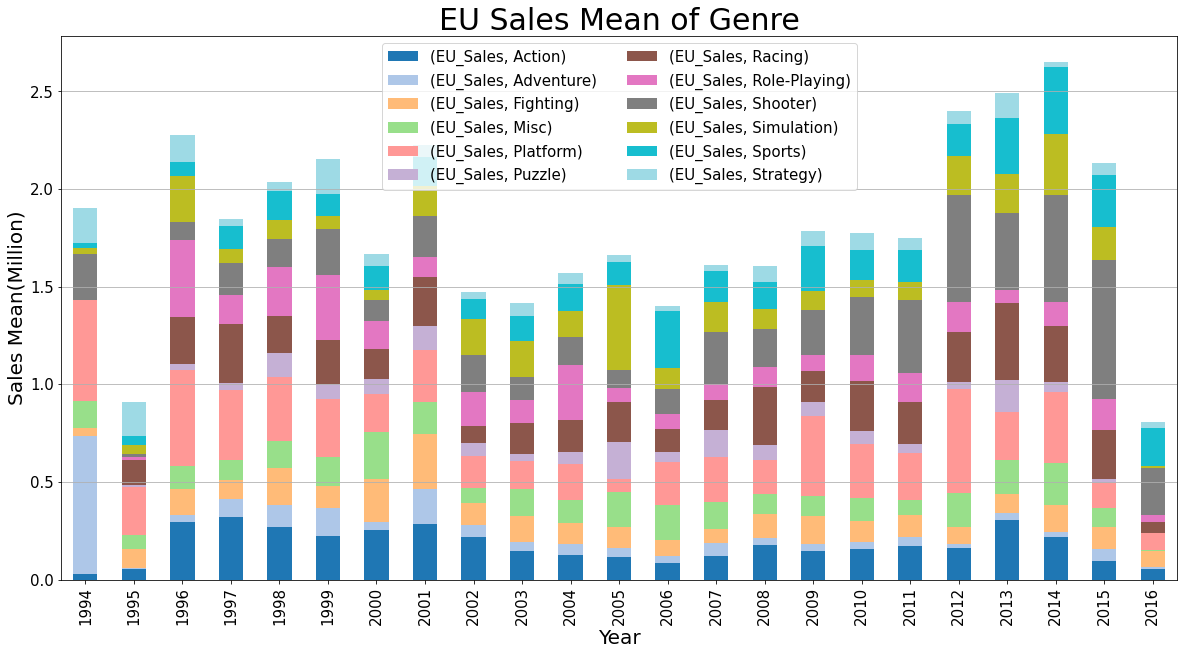

In [19]:
df_sample.groupby(['Year','Genre']).mean()['EU_Sales'].reset_index().pivot_table(index='Year', columns='Genre').plot(kind='bar', stacked=True, figsize=[20,10], colormap='tab20')
plt.legend(ncol=2, fontsize=15)
plt.title('EU Sales Mean of Genre', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales Mean(Million)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.show()

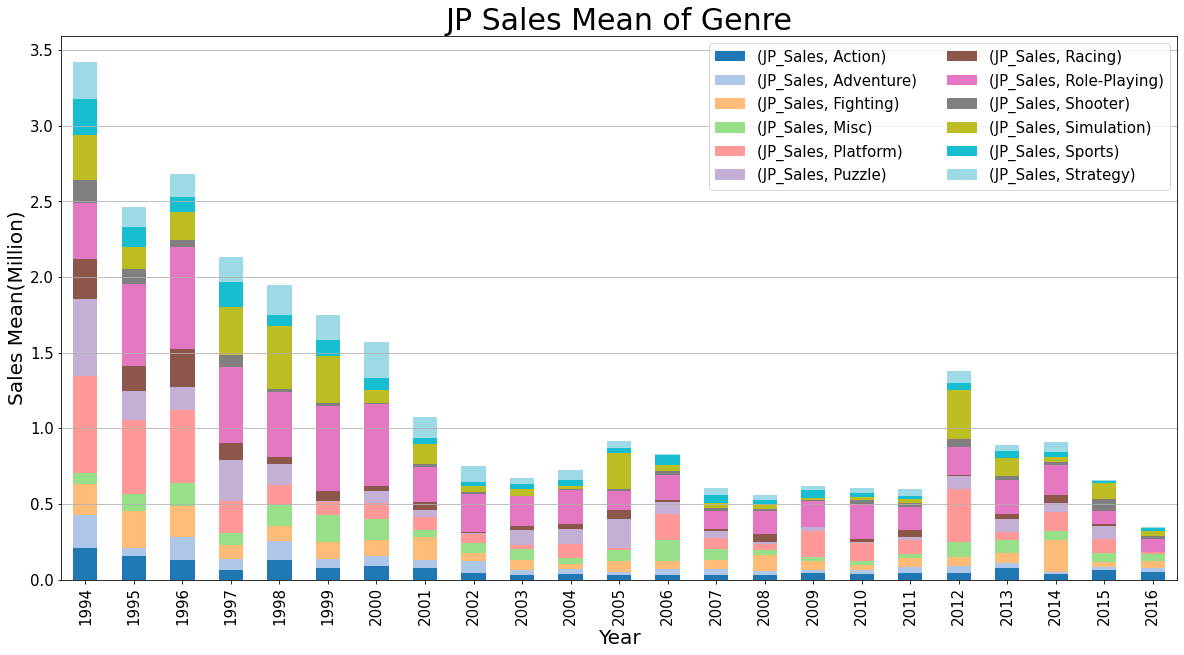

In [20]:
df_sample.groupby(['Year','Genre']).mean()['JP_Sales'].reset_index().pivot_table(index='Year', columns='Genre').plot(kind='bar', stacked=True, figsize=[20,10], colormap='tab20')
plt.legend(ncol=2, fontsize=15)
plt.title('JP Sales Mean of Genre', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales Mean(Million)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.show()

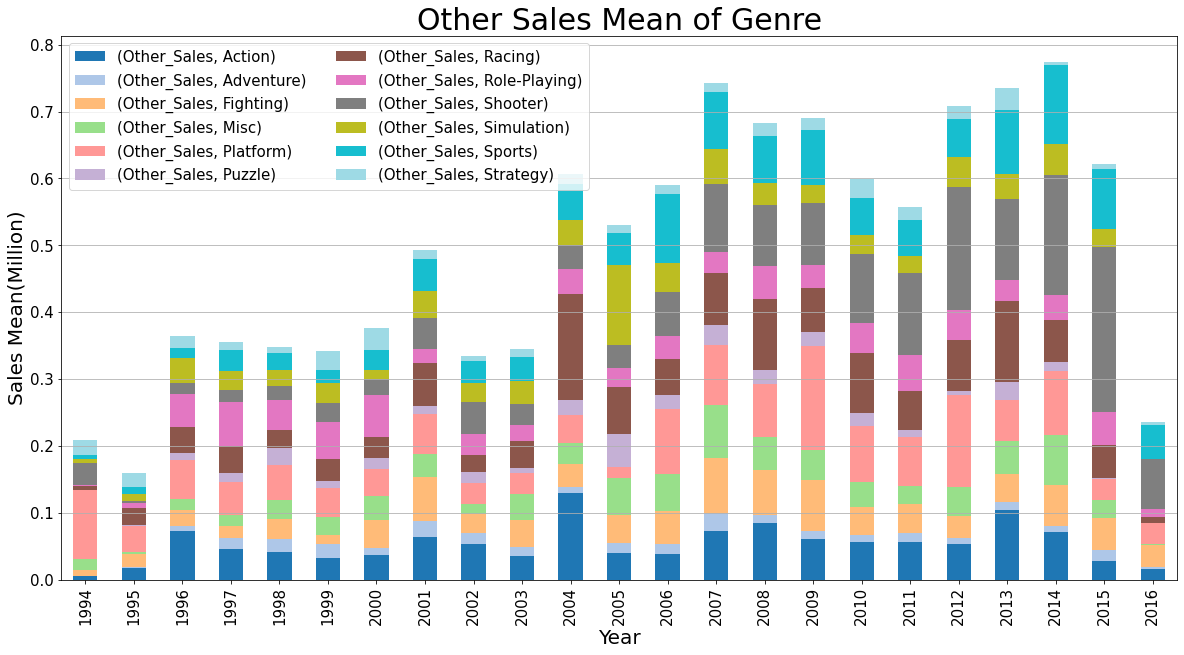

In [21]:
df_sample.groupby(['Year','Genre']).mean()['Other_Sales'].reset_index().pivot_table(index='Year', columns='Genre').plot(kind='bar', stacked=True, figsize=[20,10], colormap='tab20')
plt.legend(ncol=2, fontsize=15)
plt.title('Other Sales Mean of Genre', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales Mean(Million)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.show()

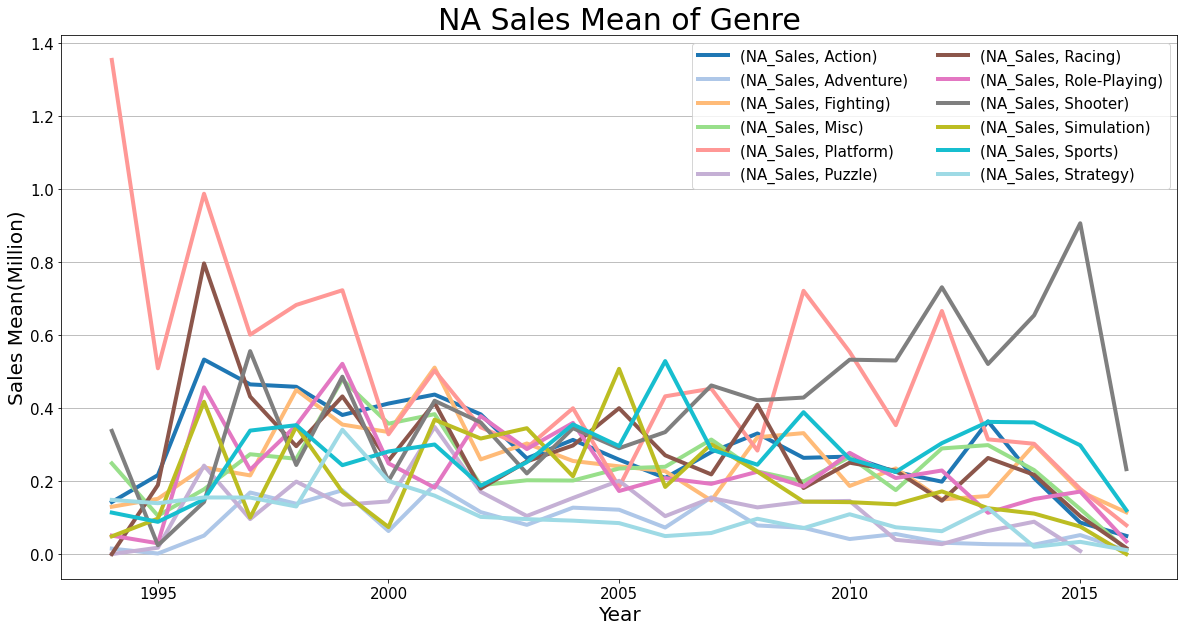

In [22]:
df_sample.groupby(['Year','Genre']).mean()['NA_Sales'].reset_index().pivot_table(index='Year', columns='Genre').plot(kind='line', figsize=[20,10], colormap='tab20', linewidth=4)
plt.legend(ncol=2, fontsize=15)
plt.title('NA Sales Mean of Genre', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales Mean(Million)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.show()

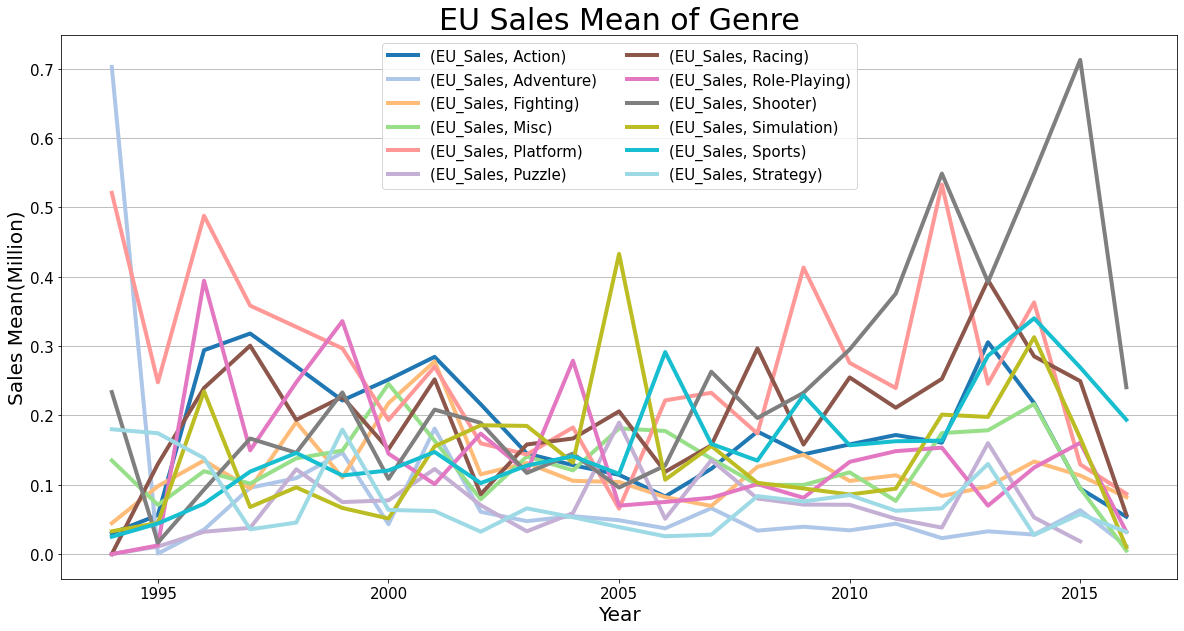

In [23]:
df_sample.groupby(['Year','Genre']).mean()['EU_Sales'].reset_index().pivot_table(index='Year', columns='Genre').plot(kind='line', figsize=[20,10], colormap='tab20', linewidth=4)
plt.legend(ncol=2, fontsize=15)
plt.title('EU Sales Mean of Genre', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales Mean(Million)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.show()

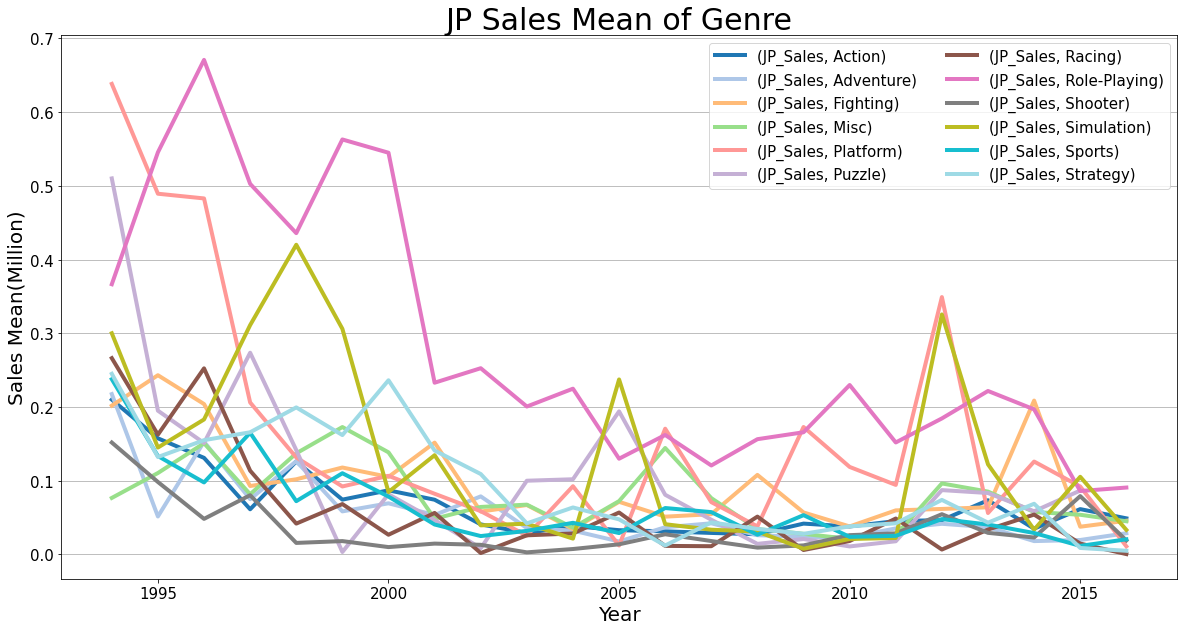

In [24]:
df_sample.groupby(['Year','Genre']).mean()['JP_Sales'].reset_index().pivot_table(index='Year', columns='Genre').plot(kind='line', figsize=[20,10], colormap='tab20', linewidth=4)
plt.legend(ncol=2, fontsize=15)
plt.title('JP Sales Mean of Genre', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales Mean(Million)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.show()

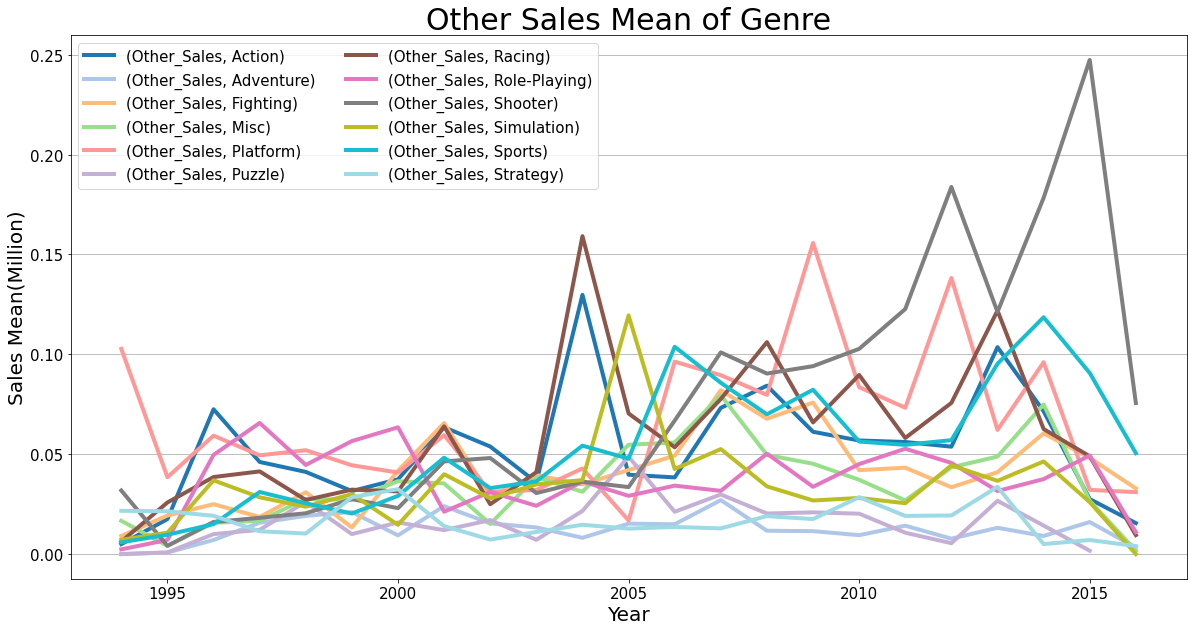

In [25]:
df_sample.groupby(['Year','Genre']).mean()['Other_Sales'].reset_index().pivot_table(index='Year', columns='Genre').plot(kind='line', figsize=[20,10], colormap='tab20', linewidth=4)
plt.legend(ncol=2, fontsize=15)
plt.title('Other Sales Mean of Genre', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Sales Mean(Million)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.show()

In [26]:
pivot_year_genre = df_sample.groupby(['Year','Genre']).mean()['NA_Sales'].reset_index().pivot_table(index='Genre', columns='Year').fillna(0)
chi2_contingency(pivot_year_genre.values*1000000)

(13388848.316205652,
 0.0,
 242,
 array([[255688.95923857, 154976.94203063, 429302.405046  ,
         358684.01685263, 386546.01999845, 438696.07174322,
         286421.47442378, 416571.74431669, 295143.81058586,
         266505.85131457, 307378.49760554, 295376.40063668,
         282383.98465852, 298339.93028386, 295366.61783178,
         309095.14115785, 299581.74915361, 245421.46225992,
         296993.06758308, 270385.10632332, 263628.43205321,
         218178.42929473,  67277.65628321],
        [ 70795.15167537,  42910.01124928, 118865.23755403,
          99312.42026341, 107026.85089257, 121466.15571881,
          79304.36959539, 115340.37257768,  81719.40978092,
          73790.13244207,  85106.94957082,  81783.8093075 ,
          78186.46954538,  82604.35131092,  81781.10064476,
          85582.25378818,  82948.18608384,  67952.28740742,
          82231.43200509,  74864.22045725,  72993.4326798 ,
          60409.23722406,  18627.83553548],
        [219294.97017514, 132917.995292

In [27]:
pivot_year_genre = df_sample.groupby(['Year','Genre']).mean()['EU_Sales'].reset_index().pivot_table(index='Genre', columns='Year').fillna(0)
chi2_contingency(pivot_year_genre.values*1000000)

(14365064.195706256,
 0.0,
 242,
 array([[184309.12259751,  87764.34638046, 220309.14326556,
         178612.78037069, 196762.08036819, 208502.63707871,
         161509.65961186, 215376.2923475 , 142366.08437035,
         136790.85300246, 151720.76710432, 160904.34609879,
         135334.46719726, 155636.22446518, 155352.25547442,
         172483.09267989, 171638.39553152, 169466.41339269,
         232108.13791933, 241084.1613728 , 256538.17774683,
         206206.47031228,  77946.98677399],
        [ 88983.13712561,  42372.00393909, 106363.69176384,
          86232.98350141,  94995.33681118, 100663.5943178 ,
          77975.71810776, 103982.14632824,  68733.33576237,
          66041.65360186,  73249.7102356 ,  77683.47703701,
          65338.52086493,  75140.06527794,  75002.96706334,
          83273.61376084,  82865.79996886,  81817.18239763,
         112060.16269498, 116393.72315333, 123854.81264674,
          99555.02128918,  37632.25235348],
        [127227.55536564,  60583.236905

In [28]:
pivot_year_genre = df_sample.groupby(['Year','Genre']).mean()['JP_Sales'].reset_index().pivot_table(index='Genre', columns='Year').fillna(0)
chi2_contingency(pivot_year_genre.values*1000000)

(6530582.872399911,
 0.0,
 242,
 array([[187710.43617292, 135161.35294421, 147027.88398086,
         116795.53653093, 106977.64956549,  95815.20862285,
          86100.21304114,  59094.0322051 ,  41174.60124687,
          36779.23448483,  39771.59446139,  50200.6015361 ,
          45680.18411801,  33193.91538097,  30601.38529902,
          33875.02357906,  33313.0936934 ,  32787.37064464,
          75481.55192607,  48830.01232911,  49882.38779965,
          36047.76412591,  19128.42704149],
        [158591.71561132, 114194.34787325, 124220.07448615,
          98677.54234571,  90382.66237381,  80951.80335715,
          72743.8536668 ,  49927.02665272,  34787.3607056 ,
          31073.82847082,  33601.99638777,  42413.19600896,
          38594.01169386,  28044.68465076,  25854.32271962,
          28620.13543471,  28145.37533912,  27701.20546802,
          63772.42022885,  41255.22046873,  42144.34541427,
          30455.82799357,  16161.11561672],
        [272260.33291338, 196041.7103059

In [29]:
pivot_year_genre = df_sample.groupby(['Year','Genre']).mean()['Other_Sales'].reset_index().pivot_table(index='Genre', columns='Year').fillna(0)
chi2_contingency(pivot_year_genre.values*1000000)

(2663169.7110616844,
 0.0,
 242,
 array([[ 22247.96267258,  17043.17118831,  38912.03823482,
          37835.68886634,  37176.49542284,  36541.69271062,
          40081.47146363,  52653.11483252,  35607.34057588,
          36742.77273048,  64644.26493263,  56571.27081689,
          62960.23015532,  79183.42544581,  72823.35623264,
          73655.22877592,  63945.86500848,  59416.71527101,
          75487.18112767,  78450.85660446,  82596.29978629,
          66279.79451238,  25062.47251608],
        [  5257.37509361,   4027.44040163,   9195.23210588,
           8940.88196851,   8785.10917966,   8635.10011961,
           9471.57871888,  12442.360615  ,   8414.30508709,
           8682.61696885,  15275.96721565,  13368.2528411 ,
          14878.01605827,  18711.68946532,  17208.75322046,
          17405.33148942,  15110.92961555,  14040.65458069,
          17838.23677646,  18538.57747131,  19518.17951654,
          15662.45619912,   5922.46673232],
        [ 17292.49752173,  13247.010518

In [30]:
df_na_max = df_sample.groupby(['Year','Genre']).count()['Other_Sales'].reset_index()
df_na_max[df_na_max['Year']==2016]

,Year,Genre,Other_Sales
264,2016,Action,118
265,2016,Adventure,33
266,2016,Fighting,14
267,2016,Misc,18
268,2016,Platform,10
269,2016,Racing,20
270,2016,Role-Playing,40
271,2016,Shooter,32
272,2016,Simulation,9
273,2016,Sports,38


##4. 게임 플랫폼 분석

In [33]:
obs = pd.crosstab(df_sample['Platform'], df_sample['Genre'])
chi2_contingency(obs)

(5432.110273172589,
 0.0,
 308,
 array([[5.96862597e-01, 2.37951238e-01, 1.53468153e-01, 3.15063315e-01,
         1.53846154e-01, 1.00737101e-01, 2.27556228e-01, 2.70837271e-01,
         2.34738235e-01, 1.58193158e-01, 4.26006426e-01, 1.24740125e-01],
        [9.90791911e+01, 3.94999055e+01, 2.54757135e+01, 5.23005103e+01,
         2.55384615e+01, 1.67223587e+01, 3.77743338e+01, 4.49589870e+01,
         3.89665470e+01, 2.62600643e+01, 7.07170667e+01, 2.07068607e+01],
        [1.03456183e+01, 4.12448812e+00, 2.66011466e+00, 5.46109746e+00,
         2.66666667e+00, 1.74610975e+00, 3.94430794e+00, 4.69451269e+00,
         4.06879607e+00, 2.74201474e+00, 7.38411138e+00, 2.16216216e+00],
        [4.22777673e+02, 1.68548794e+02, 1.08706609e+02, 2.23169848e+02,
         1.08974359e+02, 7.13554464e+01, 1.61185661e+02, 1.91843067e+02,
         1.66272916e+02, 1.12053487e+02, 3.01754552e+02, 8.83575884e+01],
        [1.33299313e+01, 5.31424431e+00, 3.42745543e+00, 7.03641404e+00,
         3.4358

In [111]:
obs

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,180,36,14,53,28,19,10,84,6,28,25,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,334,237,36,388,89,235,66,196,42,278,146,78
GB,4,3,0,6,13,7,0,18,0,5,5,6
GBA,162,35,23,86,139,39,64,72,40,18,88,18
GC,98,20,42,35,73,11,60,25,48,12,106,11
GEN,0,0,2,1,4,0,1,2,0,0,2,0
N64,36,4,29,17,30,12,56,7,24,10,79,9


In [108]:
df_sample['Total_Sales'] = df_sample['NA_Sales'] + df_sample['EU_Sales'] + df_sample['JP_Sales'] + df_sample['Other_Sales']
df_genre_plat_tot = df_sample.groupby(['Genre','Platform']).mean().reset_index()
df_genre_plat_tot = df_genre_plat_tot[['Genre','Platform','Total_Sales']]
df_genre_plat_tot.pivot_table(index='Platform', columns='Genre')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Total_Sales                      ...                               
Genre         Action Adventure  Fighting  ... Simulation    Sports  Strategy
Platform                                  ...                               
3DO              NaN  0.060000       NaN  ...   0.020000       NaN       NaN
3DS         0.313833  0.131667  0.745714  ...   0.951071  0.247200  0.138000
DC          0.420000  0.227273  0.152500  ...   0.520000  0.365000       NaN
DS          0.341228  0.198776  0.200000  ...   0.470755  0.216781  0.188462
GB          1.007500  1.403333       NaN  ...   0.710000  0.602000  1.313333
GBA         0.334136  0.339143  0.180870  ...   0.330000  0.185455  0.414444
GC          0.378673  0.296500  0.438810  ...   0.717500  0.229811  0.389091
GEN              NaN       NaN  0.710000  ...        NaN  0.580000       NaN
N64         0.814167  0.112500  0.762414  ...   1.018000  0.412025  1.148889
NES              NaN       NaN       NaN  ...        NaN       NaN       NaN
NG               NaN       NaN  0.134444  ...        NaN  0.020000       NaN
PC          0.185375  0.144531  0.028000  ...   0.457222  0.244286  0.250608
PCFX             NaN       NaN       NaN  ...        NaN       NaN       NaN
PS          0.820850  0.313788  0.673519  ...   0.422333  0.540679  0.310857
PS2         0.783953  0.108821  0.610959  ...   0.474831  0.670514  0.213857
PS3         0.817046  0.317361  0.680395  ...   0.356333  0.642952  0.216818
PS4         0.700000  0.247368  0.472941  ...   0.154000  1.165116  0.084000
PSP         0.290185  0.050141  0.299863  ...   0.216897  0.307308  0.176897
PSV         0.142643  0.048810  0.198750  ...   0.023333  0.213043  0.044286
SAT         0.216667  0.160000  0.275161  ...   0.161429  0.174375  0.180000
SCD              NaN       NaN       NaN  ...        NaN       NaN  0.140000
SNES        0.380000  0.430000  0.610000  ...   0.432000  0.395313  0.331000
TG16             NaN  0.140000       NaN  ...        NaN       NaN       NaN
WS               NaN       NaN       NaN  ...        NaN       NaN  0.100000
Wii         0.481747  0.220000  0.580732  ...   0.434286  1.132656  0.209600
WiiU        0.306508  0.063333  1.268000  ...   0.210000  0.413750  0.413333
X360        0.753459  0.323191  0.579531  ...   0.392222  0.638744  0.362593
XB          0.312105  0.116154  0.290909  ...   0.296250  0.315427  0.130476
XOne        0.496765  0.226364  0.334286  ...   0.180000  0.666111  0.130000

[29 rows x 12 columns]

##5. 출고량이 높은 게임 분석

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_pca = df.loc[:,'NA_Sales':]

scaler = StandardScaler()
Z = scaler.fit_transform(df_pca)

pca = PCA(2)
pca.fit(Z)

B = pca.transform(Z)
pca.explained_variance_ratio_

array([0.67331902, 0.18988961])

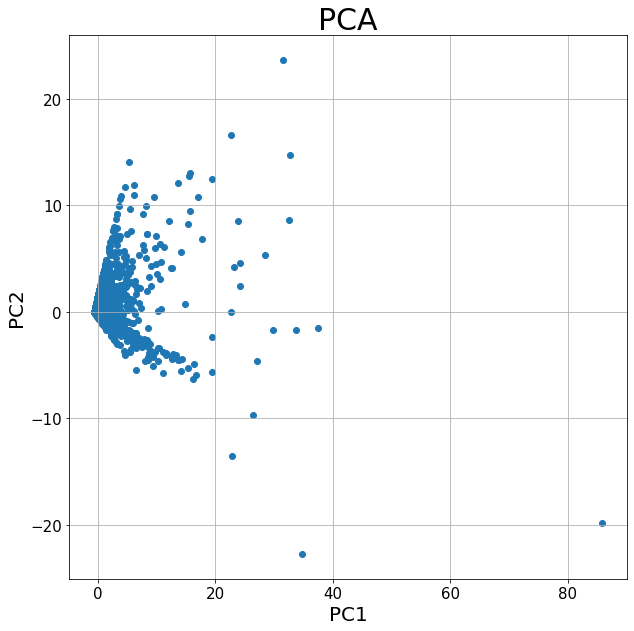

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(B[:,0], B[:,1])
plt.title('PCA', fontsize=30)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

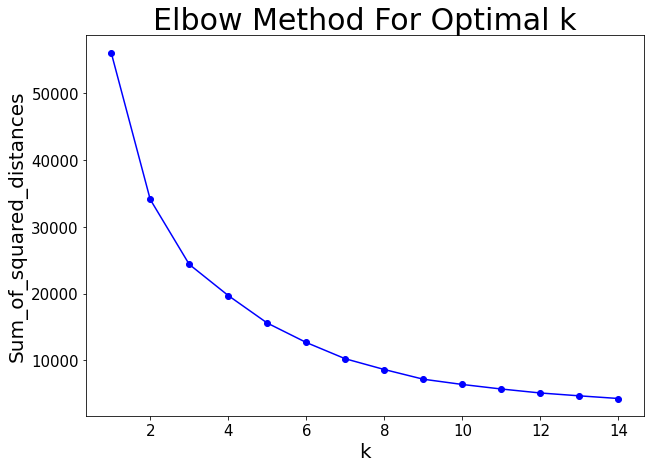

In [96]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(B)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(10,7))
plt.plot(K, sum_of_squared_distances, 'bo-')
plt.xlabel('k', fontsize=20)
plt.ylabel('Sum_of_squared_distances', fontsize=20)
plt.title('Elbow Method For Optimal k', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [83]:
num_k = 9
km = KMeans(n_clusters=num_k)
km = km.fit(B)
df_kmeans = df_pca.copy()
df_kmeans['PC1'] = B[:,0]
df_kmeans['PC2'] = B[:,1]
df_kmeans['Cluster'] = km.labels_
df_kmeans.dtypes

NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
PC1            float64
PC2            float64
Cluster          int32
dtype: object

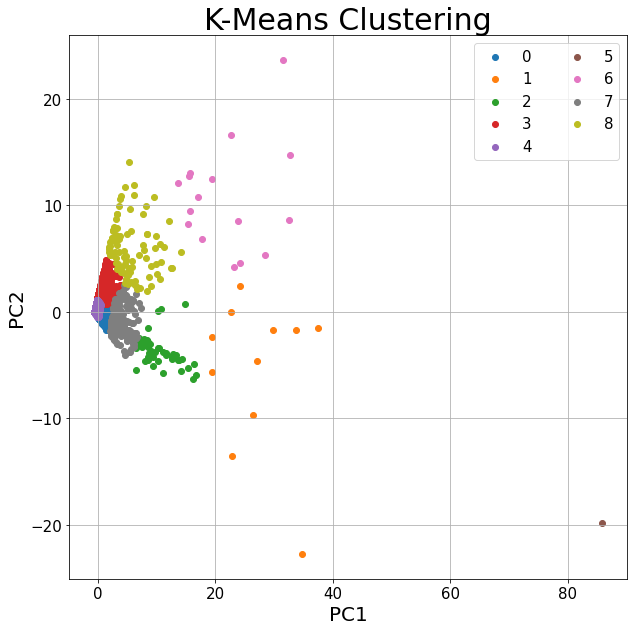

In [90]:
import matplotlib.pyplot as plt

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

plt.figure(figsize=(10,10))
for idx in range(num_k):
  df_kmeans_plot = df_kmeans[df_kmeans['Cluster'] == idx]
  plt.scatter(df_kmeans_plot['PC1'], df_kmeans_plot['PC2'], color=colors[idx], label=idx)

plt.legend(ncol=2, fontsize=15)
plt.title('K-Means Clustering', fontsize=30)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()


In [98]:
df_res = df[df_kmeans['Cluster'] == 6]
df_res

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
503,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18
1187,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
3211,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
6796,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90
7673,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
9233,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71
9307,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42
10345,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37
10410,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82
